# K-means

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

X = df.values

In [3]:
def euclidean_distance(X, centers):
    distances = np.zeros((X.shape[0], centers.shape[0]))
    for i, x in enumerate(X):
        for j, center in enumerate(centers):
            distances[i, j] = np.sqrt(np.sum((x - center) ** 2))
    return distances

def manhattan_distance(X, centers):
    distances = np.zeros((X.shape[0], centers.shape[0]))
    for i, x in enumerate(X):
        for j, center in enumerate(centers):
            distances[i, j] = np.sum(np.abs(x - center))
    return distances

def minkowski_distance(X, centers, p):
    distances = np.zeros((X.shape[0], centers.shape[0]))
    for i, x in enumerate(X):
        for j, center in enumerate(centers):
            distances[i, j] = np.sum(np.abs(x - center) ** p) ** (1 / p)
    return distances

In [4]:
def k_means_clustering(X, k, distance_func, p=2):
    np.random.seed(42)
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    
    while True:
        if distance_func == minkowski_distance:
            distances = distance_func(X, centers, p)
        else:
            distances = distance_func(X, centers)

        labels = np.argmin(distances, axis=1)

        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return labels, centers

In [5]:
def calculate_sse(X, centers, labels):
    sse = 0
    for i, x in enumerate(X):
        center = centers[labels[i]]
        sse += np.sum((x - center) ** 2)
    return sse

In [6]:
def plot_clusters(X, labels, centers, k, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(k):
        ax.scatter(X[labels == i][:, 0], X[labels == i][:, 1], X[labels == i][:, 2], label=f'Cluster {i+1}')

    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=200, marker='X', label='Centers')

    ax.set_title(title)
    ax.set_xlabel('Points')
    ax.set_ylabel('Assists')
    ax.set_zlabel('Rebounds')
    ax.legend()
    plt.show()

In [7]:
def plot_elbow_method(X, k_values, distance_func, p=2):
    sse_values = []
    for k in k_values:
        labels, centers = k_means_clustering(X, k, distance_func, p)
        sse = calculate_sse(X, centers, labels)
        sse_values.append(sse)
    
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, sse_values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

In [8]:
k = 3  

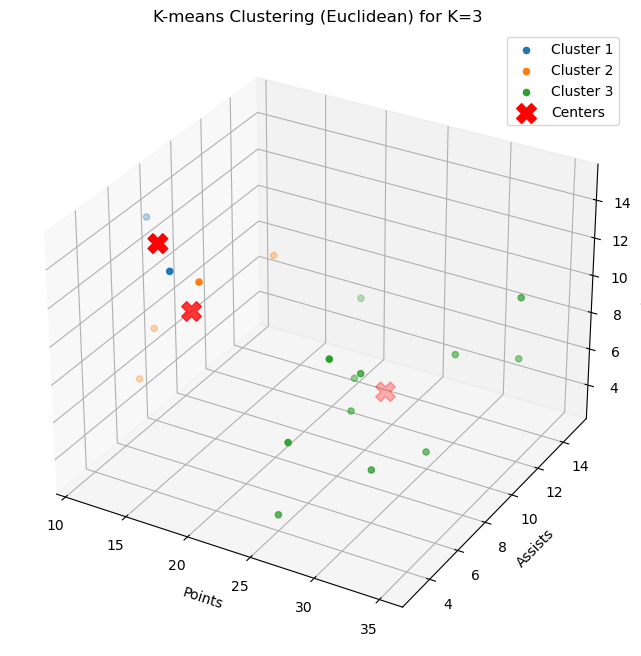

In [9]:
# K-means using Euclidean distance
labels, centers = k_means_clustering(X, k, euclidean_distance)
plot_clusters(X, labels, centers, k, title=f'K-means Clustering (Euclidean) for K={k}')

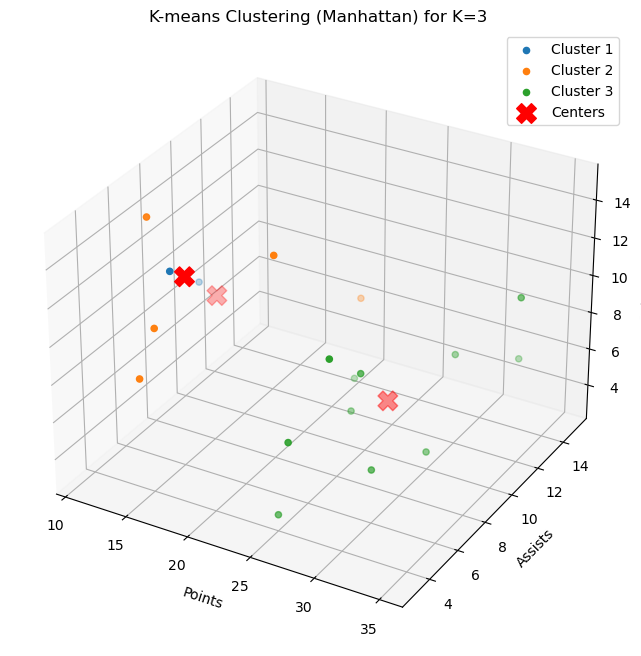

In [10]:
# K-means using Manhattan distance
labels, centers = k_means_clustering(X, k, manhattan_distance)
plot_clusters(X, labels, centers, k, title=f'K-means Clustering (Manhattan) for K={k}')

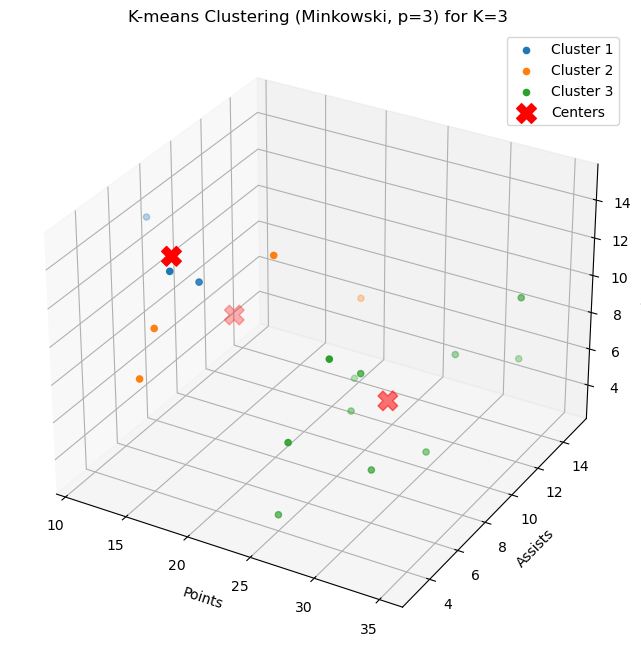

In [11]:
# K-means using Minkowski distance with p=3
labels, centers = k_means_clustering(X, k, minkowski_distance, p=3)
plot_clusters(X, labels, centers, k, title=f'K-means Clustering (Minkowski, p=3) for K={k}')

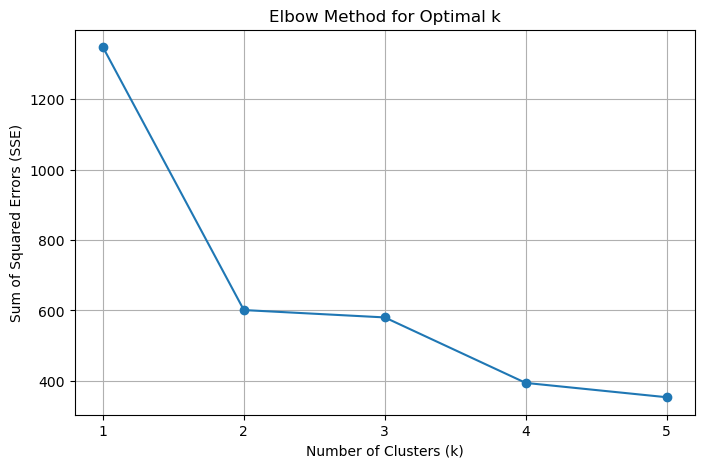

In [12]:
# Plot SSE for Euclidean distance using the elbow method
plot_elbow_method(X, range(1, 6), euclidean_distance)

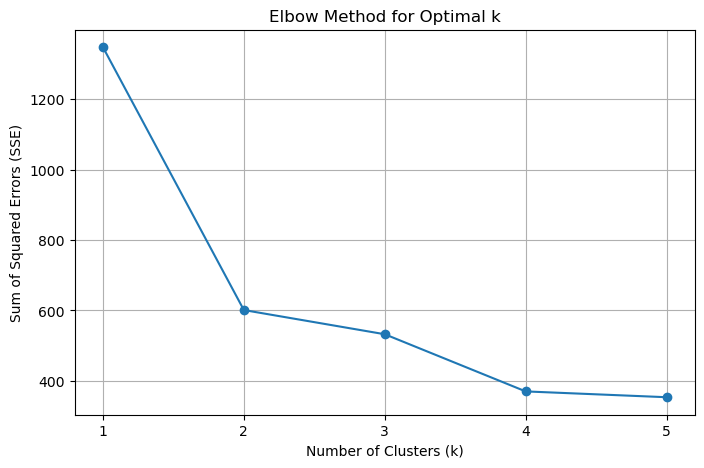

In [13]:
# Plot SSE for Manhattan distance using the elbow method
plot_elbow_method(X, range(1, 6), manhattan_distance)

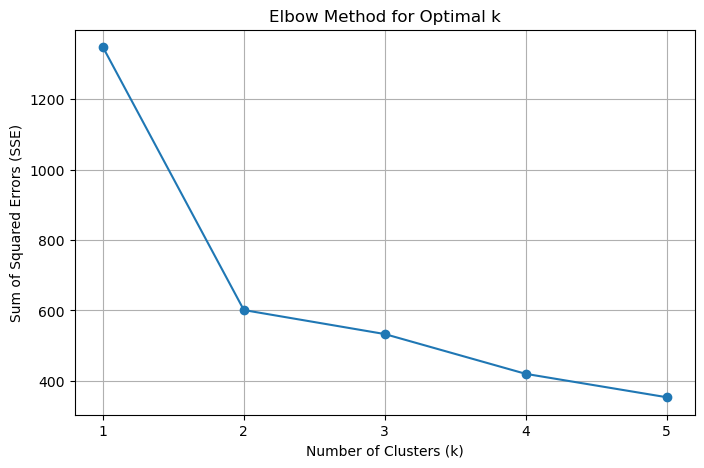

In [14]:
# Plot SSE for Minkowski distance with p=3 using the elbow method
plot_elbow_method(X, range(1, 6), minkowski_distance, p=3)